## Load data and reshape them and choose one label to prediction

In [20]:
from sklearn.model_selection import train_test_split
from import_data import import_data

data, results = import_data("US26")
data = data.mean(axis=1)
results = results[:, 1]

X_train, X_test, y_train, y_test = train_test_split(data, results, test_size=0.2, random_state=1410)

#print(data.shape)

## Learning and visualization without any preprocessing

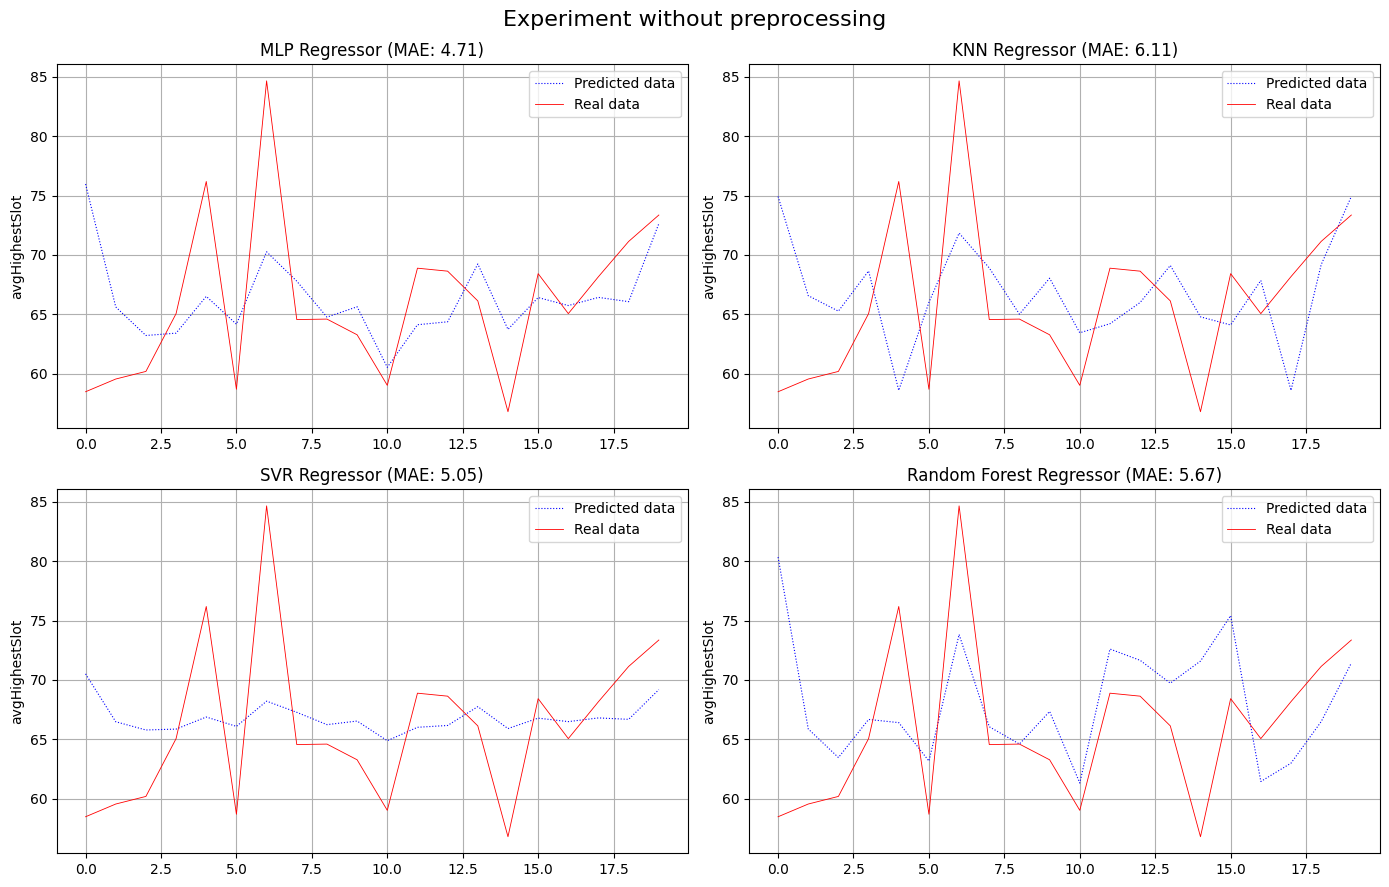

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings("ignore")

# MLP
mlp = MLPRegressor(hidden_layer_sizes=500, batch_size=30, random_state=1410, warm_start=True)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

# KNN
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# SVR
svr = SVR(kernel="poly")
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# RFR
rfr = RandomForestRegressor(random_state=1410)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

# Show results
fig, ax = plt.subplots(2, 2, figsize=(14,9))

# MLP
ax[0,0].plot(y_pred_mlp, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[0,0].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[0,0].set_ylabel("avgHighestSlot")
ax[0,0].set_title(f"MLP Regressor (MAE: {round(mae_mlp, 2)})")
ax[0,0].legend()
ax[0,0].grid()

# KNN
ax[0,1].plot(y_pred_knn, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[0,1].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[0,1].set_ylabel("avgHighestSlot")
ax[0,1].set_title(f"KNN Regressor (MAE: {round(mae_knn, 2)})")
ax[0,1].legend()
ax[0,1].grid()

# SVR
ax[1,0].plot(y_pred_svr, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[1,0].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[1,0].set_ylabel("avgHighestSlot")
ax[1,0].set_title(f"SVR Regressor (MAE: {round(mae_svr, 2)})")
ax[1,0].legend()
ax[1,0].grid()

# Random Forest Regressor
ax[1,1].plot(y_pred_rfr, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[1,1].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[1,1].set_ylabel("avgHighestSlot")
ax[1,1].set_title(f"Random Forest Regressor (MAE: {round(mae_rfr, 2)})")
ax[1,1].legend()
ax[1,1].grid()

plt.suptitle("Experiment without preprocessing", fontsize=16)
plt.tight_layout()
plt.show()

## Learning and visualization with MinMaxScaler

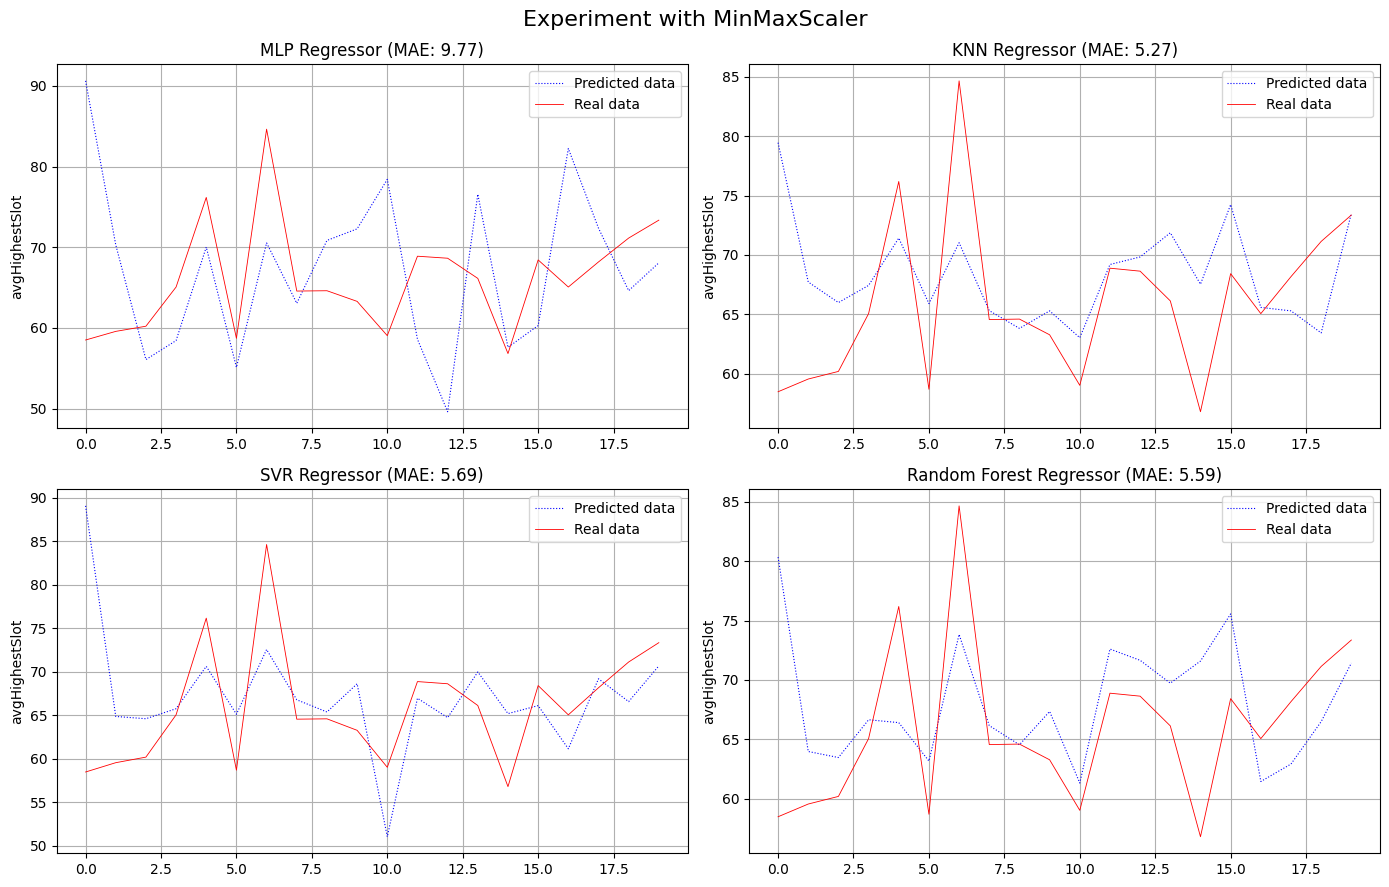

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

mms = MinMaxScaler()
mms.fit(X_train, y_train)

X_train_t = mms.transform(X_train)
X_test_t = mms.transform(X_test)


# MLP
mlp = MLPRegressor(hidden_layer_sizes=500, batch_size=30, random_state=1410, warm_start=True)
mlp.fit(X_train_t, y_train)
y_pred_mlp = mlp.predict(X_test_t)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

# KNN
knn = KNeighborsRegressor()
knn.fit(X_train_t, y_train)
y_pred_knn = knn.predict(X_test_t)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# SVR
svr = SVR(kernel="poly")
svr.fit(X_train_t, y_train)
y_pred_svr = svr.predict(X_test_t)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# RFR
rfr = RandomForestRegressor(random_state=1410)
rfr.fit(X_train_t, y_train)
y_pred_rfr = rfr.predict(X_test_t)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

# Show results
fig, ax = plt.subplots(2, 2, figsize=(14,9))

# MLP
ax[0,0].plot(y_pred_mlp, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[0,0].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[0,0].set_ylabel("avgHighestSlot")
ax[0,0].set_title(f"MLP Regressor (MAE: {round(mae_mlp, 2)})")
ax[0,0].legend()
ax[0,0].grid()

# KNN
ax[0,1].plot(y_pred_knn, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[0,1].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[0,1].set_ylabel("avgHighestSlot")
ax[0,1].set_title(f"KNN Regressor (MAE: {round(mae_knn, 2)})")
ax[0,1].legend()
ax[0,1].grid()

# SVR
ax[1,0].plot(y_pred_svr, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[1,0].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[1,0].set_ylabel("avgHighestSlot")
ax[1,0].set_title(f"SVR Regressor (MAE: {round(mae_svr, 2)})")
ax[1,0].legend()
ax[1,0].grid()

# Random Forest Regressor
ax[1,1].plot(y_pred_rfr, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[1,1].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[1,1].set_ylabel("avgHighestSlot")
ax[1,1].set_title(f"Random Forest Regressor (MAE: {round(mae_rfr, 2)})")
ax[1,1].legend()
ax[1,1].grid()

plt.suptitle("Experiment with MinMaxScaler", fontsize=16)
plt.tight_layout()
plt.show()

# Add PCA before learning

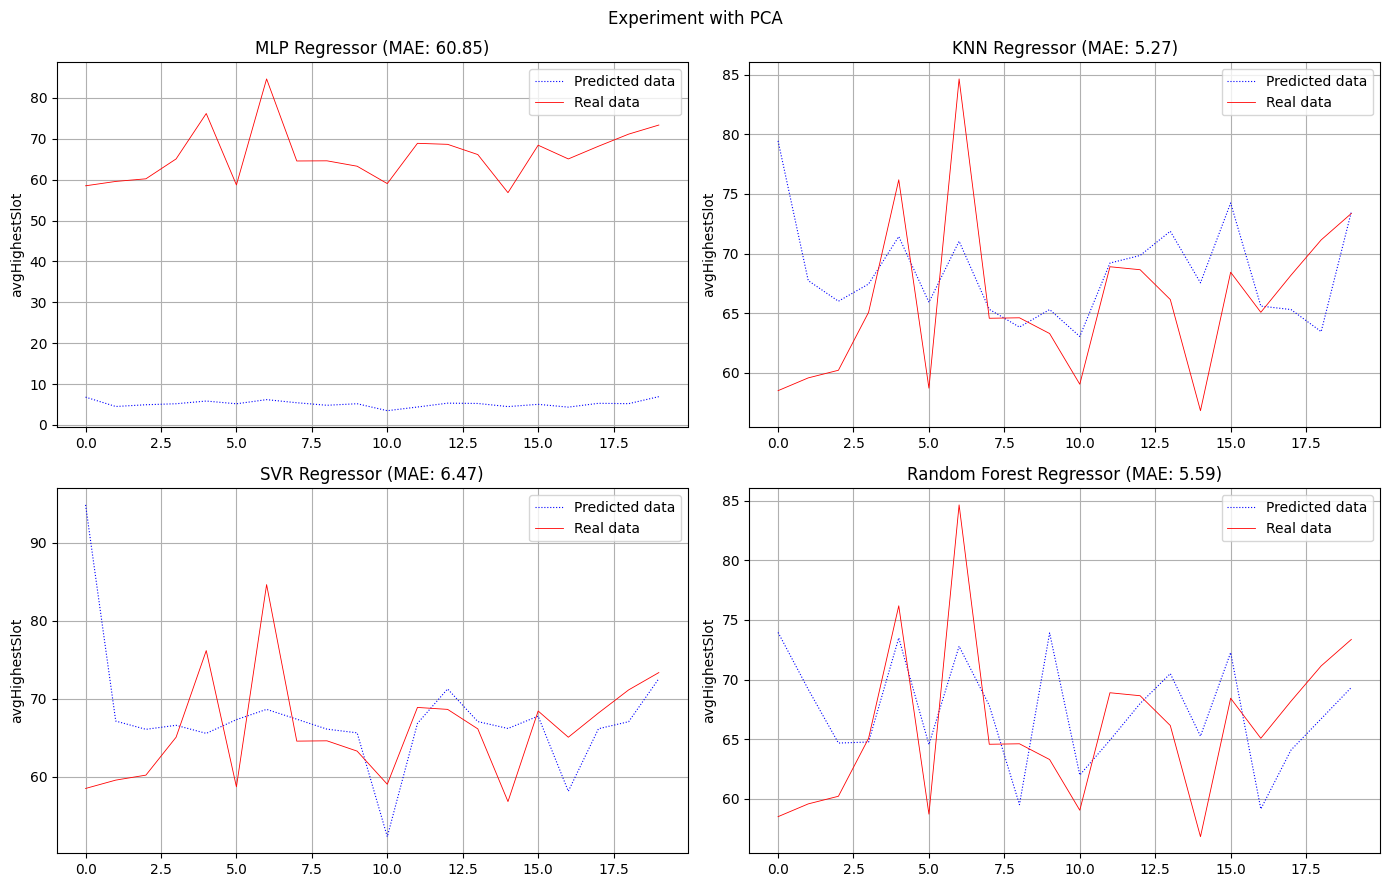

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")


pca = PCA()
pca.fit(X_train_t, y_train)

X_train_pca = pca.transform(X_train_t)
X_test_pca = pca.transform(X_test_t)

# MLP
mlp = MLPRegressor(hidden_layer_sizes=500, batch_size=30, random_state=1410, warm_start=True)
mlp.fit(X_train_pca, y_train)
y_pred_mlp = mlp.predict(X_test_pca)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

# KNN
knn = KNeighborsRegressor()
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# SVR
svr = SVR(kernel="poly")
svr.fit(X_train_pca, y_train)
y_pred_svr = svr.predict(X_test_pca)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# RFR
rfr = RandomForestRegressor(random_state=1410)
rfr.fit(X_train_pca, y_train)
y_pred_rfr = rfr.predict(X_test_pca)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

# Show results
fig, ax = plt.subplots(2, 2, figsize=(14,9))

# MLP
ax[0,0].plot(y_pred_mlp, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[0,0].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[0,0].set_ylabel("avgHighestSlot")
ax[0,0].set_title(f"MLP Regressor (MAE: {round(mae_mlp, 2)})")
ax[0,0].legend()
ax[0,0].grid()

# KNN
ax[0,1].plot(y_pred_knn, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[0,1].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[0,1].set_ylabel("avgHighestSlot")
ax[0,1].set_title(f"KNN Regressor (MAE: {round(mae_knn, 2)})")
ax[0,1].legend()
ax[0,1].grid()

# SVR
ax[1,0].plot(y_pred_svr, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[1,0].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[1,0].set_ylabel("avgHighestSlot")
ax[1,0].set_title(f"SVR Regressor (MAE: {round(mae_svr, 2)})")
ax[1,0].legend()
ax[1,0].grid()

# Random Forest Regressor
ax[1,1].plot(y_pred_rfr, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[1,1].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[1,1].set_ylabel("avgHighestSlot")
ax[1,1].set_title(f"Random Forest Regressor (MAE: {round(mae_rfr, 2)})")
ax[1,1].legend()
ax[1,1].grid()

plt.suptitle("Experiment with PCA")
plt.tight_layout()
plt.show()